In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import glob


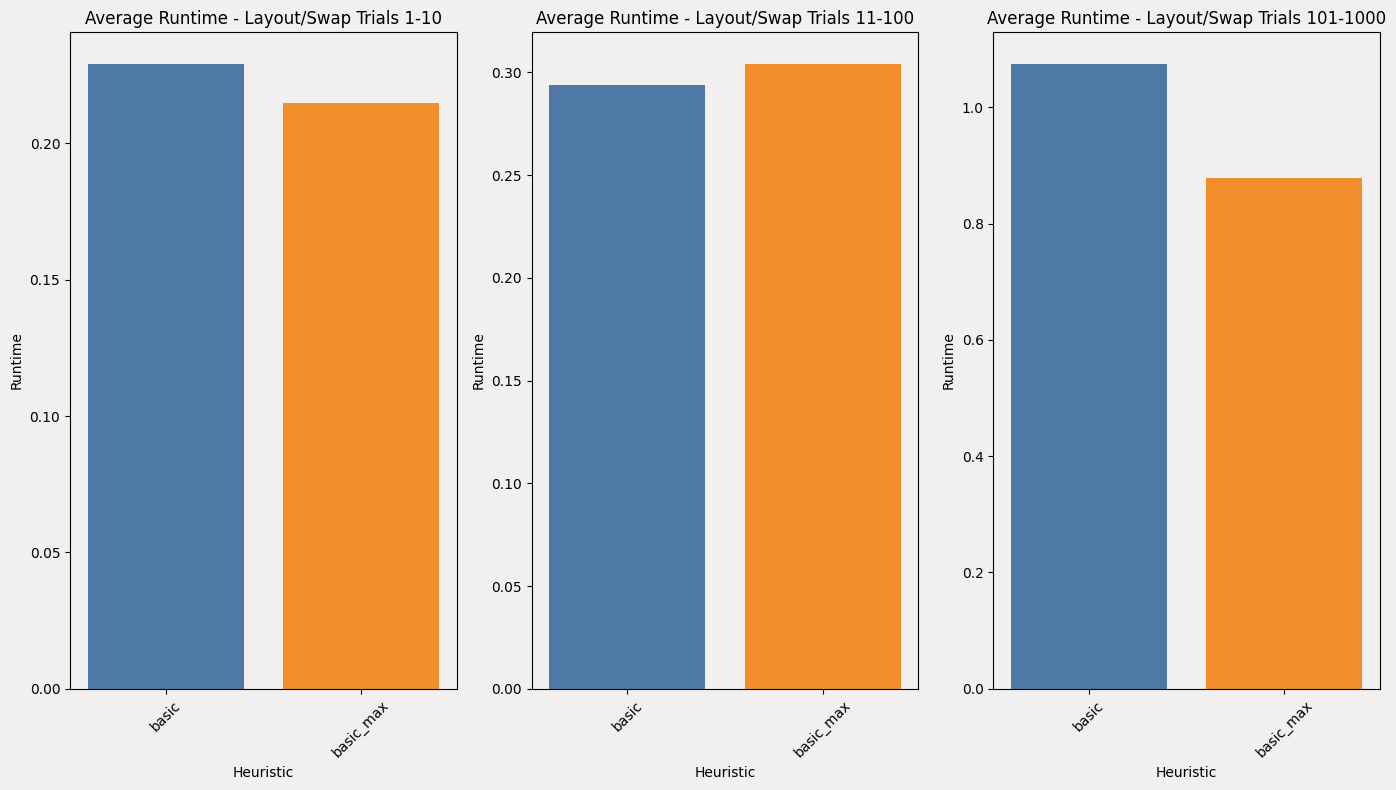

<Figure size 640x480 with 0 Axes>

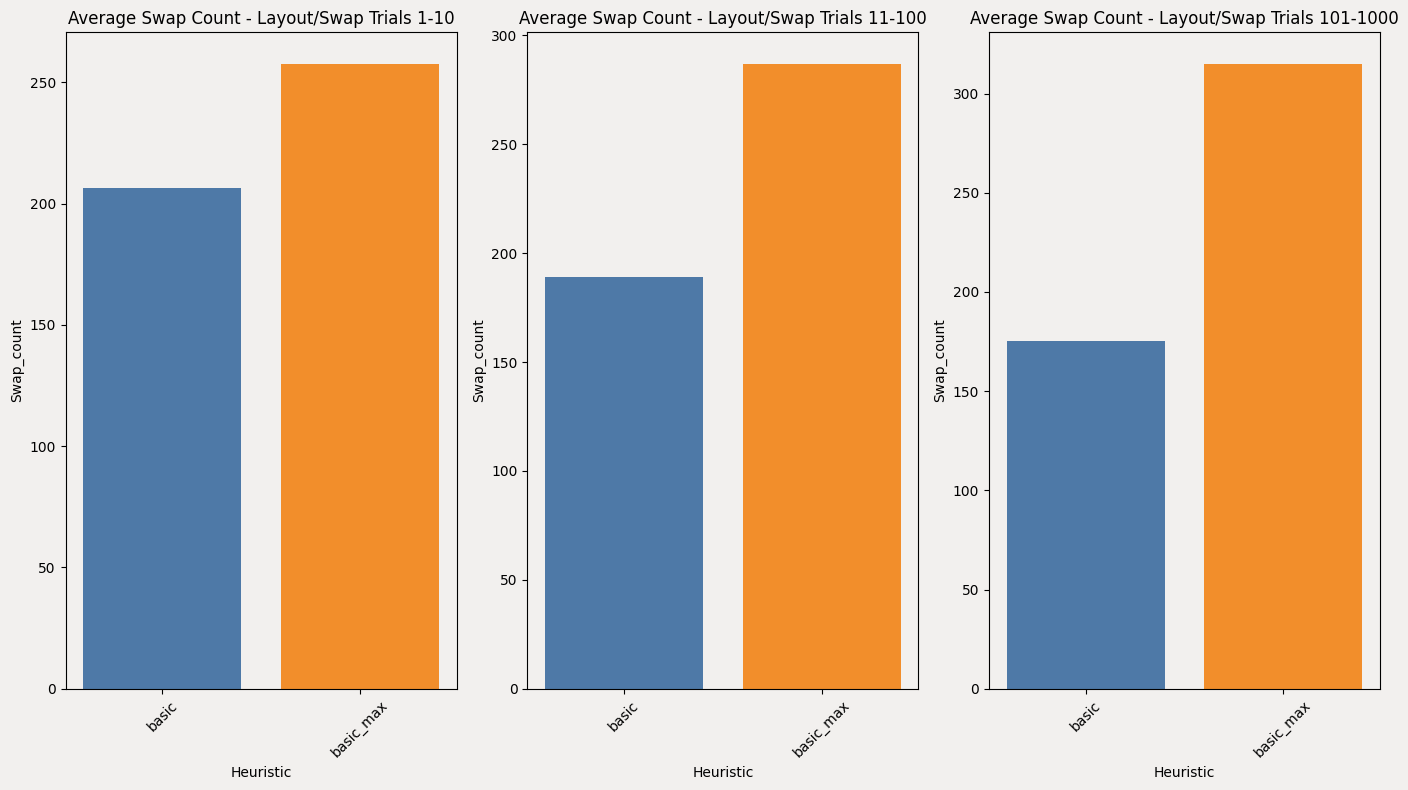

<Figure size 640x480 with 0 Axes>

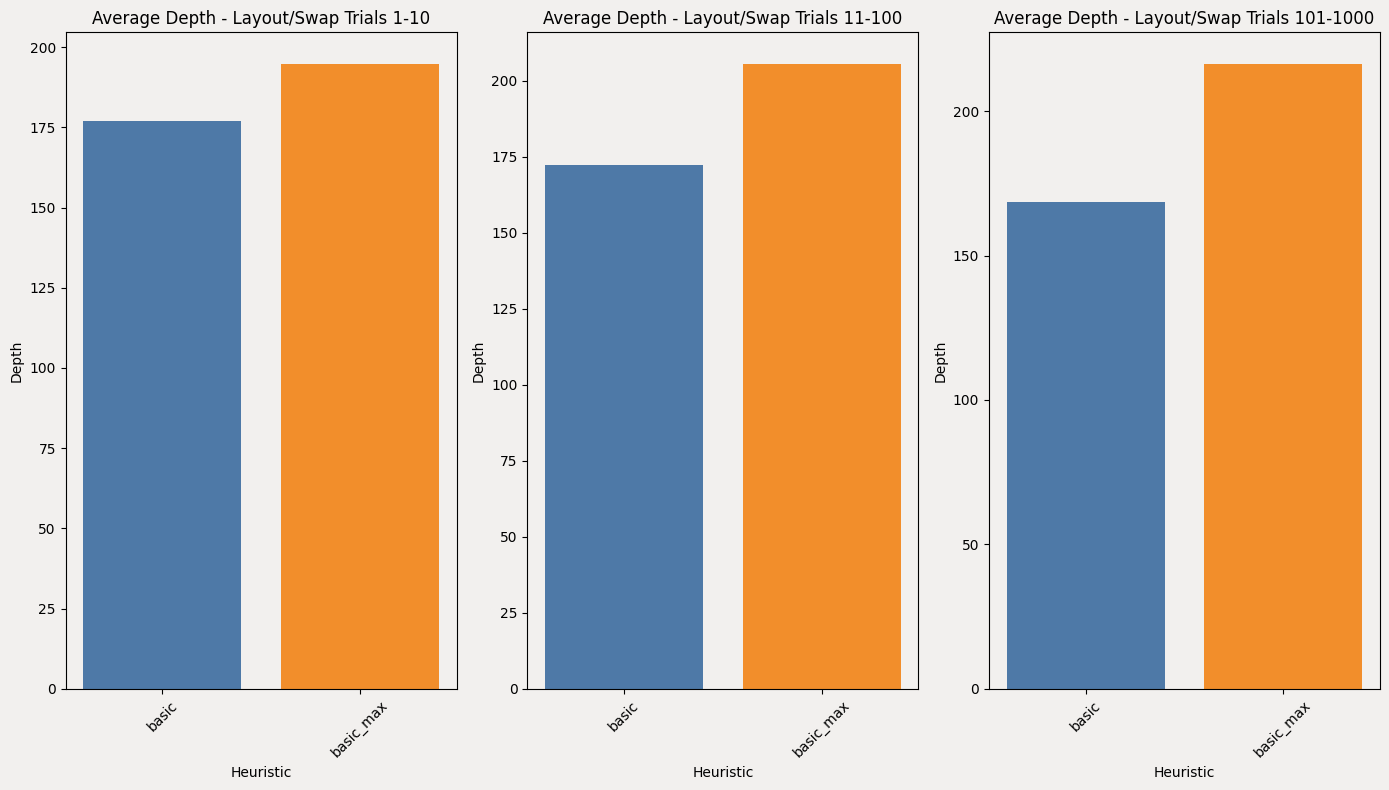

<Figure size 640x480 with 0 Axes>

In [57]:


# Define the layout trials clusters
clusters = {
    "1-10": range(1, 11),
    "11-100": range(11, 101),
    "101-1000": range(101, 1001)
}

# Directory containing the CSV files
directory = "experiments/"
files = ["ghz_basic.csv", "ghz_basic_max.csv"]
# Initialize a dictionary to store aggregated data
aggregated_data = {
    "heuristic": [],
    "cluster": [],
    "avg_runtime": [],
    "avg_swap_count": [],
    "avg_depth": []
}

# Process each file
for file in files:
    heuristic_name = file.split("/")[-1].replace("ghz_", "").replace(".csv", "")
    df = pd.read_csv(directory + file)
    
    # Process each cluster
    for cluster_name, cluster_range in clusters.items():
        cluster_df = df[df['layout_trials'].isin(cluster_range)]
        
        avg_runtime = cluster_df['avg_runtime'].mean()
        avg_swap_count = cluster_df['avg_swap_count'].mean()
        avg_depth = cluster_df['avg_depth'].mean()
        
        aggregated_data["heuristic"].append(heuristic_name)
        aggregated_data["cluster"].append(cluster_name)
        aggregated_data["avg_runtime"].append(avg_runtime)
        aggregated_data["avg_swap_count"].append(avg_swap_count)
        aggregated_data["avg_depth"].append(avg_depth)

# Convert the aggregated data to a DataFrame
agg_df = pd.DataFrame(aggregated_data)

# Define colors for the heuristics
colors = {
    "basic": "#4E79A7",
    "basic_max": "#F28E2B",
}

# Define the background color
background_color = '#F2F0EE'

# Plotting bar graphs for each metric with a log scale y-axis
metrics = ["avg_runtime", "avg_swap_count", "avg_depth"]
titles = ["Average Runtime", "Average Swap Count", "Average Depth"]

for metric, title in zip(metrics, titles):
    plt.figure(figsize=(14, 8))
    
    # Set the background color for the entire figure
    plt.gcf().set_facecolor(background_color)
    
    for idx, cluster in enumerate(clusters.keys()):
        cluster_data = agg_df[agg_df['cluster'] == cluster]
        
        ax = plt.subplot(1, 3, idx+1)
        ax.bar(cluster_data['heuristic'], cluster_data[metric], color=[colors[h] for h in cluster_data['heuristic']])
        
        # Set the background color for the axes
        ax.set_facecolor(background_color)
        
        ax.set_title(f"{title} - Layout/Swap Trials {cluster}")
        ax.set_ylabel(metric.replace("avg_", "").capitalize())
        ax.set_xlabel("Heuristic")
        ax.set_xticks(cluster_data['heuristic'])
        ax.set_xticklabels(cluster_data['heuristic'], rotation=45)
    
    plt.tight_layout()
    plt.show()

    plt.savefig(f"graphs/{title.replace(' ', '_').lower()}.png", dpi=300, bbox_inches='tight')

In [58]:
# Convert the aggregated data to a DataFrame
agg_df = pd.DataFrame(aggregated_data)

# Display the summary table
print("\nSummary Table:")
print(agg_df)



Summary Table:
   heuristic   cluster  avg_runtime  avg_swap_count   avg_depth
0      basic      1-10     0.229272      206.337143  176.885714
1      basic    11-100     0.294018      188.927575  172.295681
2      basic  101-1000     1.075263      175.231611  168.386626
3  basic_max      1-10     0.214712      257.751429  194.862857
4  basic_max    11-100     0.304265      287.023920  205.635216
5  basic_max  101-1000     0.879257      315.089970  216.469909
